# Thompson Sampling

---

## Import the libraries

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


---

## Import the dataset

In [78]:
dataset = pd.read_csv('0600-Data/Ads_CTR_Optimisation.csv')


---

## Train the model

In [79]:
import random

N = len(dataset)
d = len(dataset.columns)
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0

    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)

        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    reward = dataset.values[n, ad]

    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1

    total_reward += reward



---

## Visualize the result

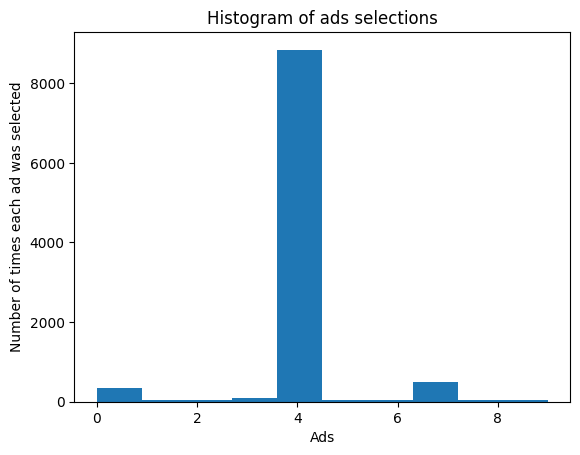

In [80]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()